In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np

# from https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=demo_r_mwk_05
# data = read_csv('data/demo_r_mwk_05_1_Data.csv', na_values=':')
# 
data = read_csv('data/demo_r_mwk_05__custom_4646510_linear.csv', na_values=':')


# from https://podaci.dzs.hr/media/vb1ae2vm/procjene-stanovnistva.xlsx
population = read_csv('data/population.csv')

In [2]:
data

,DATAFLOW,LAST UPDATE,freq,age,sex,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2000-W01,1069,NaN
1,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,UNK,T,NR,HR,2000-W01,0,NaN
2,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y10-14,T,NR,HR,2000-W01,1,NaN
3,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y15-19,T,NR,HR,2000-W01,4,NaN
4,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y20-24,T,NR,HR,2000-W01,1,NaN
...,...,...,...,...,...,...,...,...,...,...
25111,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y75-79,T,NR,HR,2022-W48,108,p
25112,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y80-84,T,NR,HR,2022-W48,177,p
25113,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y85-89,T,NR,HR,2022-W48,184,p
25114,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y_GE90,T,NR,HR,2022-W48,143,p


In [3]:
short_to_long_name = {'TOTAL': 'Total',
                        'UNK': 'Unknown',
                        'Y_LT5' : 'Less than 5 years',
                        'Y5-9'  : 'From 5 to 9 years',
                        'Y10-14' : 'From 10 to 14 years',
                        'Y15-19' : 'From 15 to 19 years',
                        'Y20-24' : 'From 20 to 24 years',
                        'Y25-29' : 'From 25 to 29 years',
                        'Y30-34' : 'From 30 to 34 years',
                        'Y35-39' : 'From 35 to 39 years',
                        'Y40-44' : 'From 40 to 44 years',
                        'Y45-49' : 'From 45 to 49 years',
                        'Y50-54' : 'From 50 to 54 years',
                        'Y55-59' : 'From 55 to 59 years',
                        'Y60-64' : 'From 60 to 64 years',
                        'Y65-69' : 'From 65 to 69 years',
                        'Y70-74' : 'From 70 to 74 years',
                        'Y75-79' : 'From 75 to 79 years',
                        'Y80-84' : 'From 80 to 84 years',
                        'Y85-89' : 'From 85 to 89 years',
                        'Y_GE90' : '90 years or over'}


In [4]:
sorted_age_groups = ['Less than 15 years',
                    'From 15 to 24 years',
                     'From 25 to 34 years',
                     'From 35 to 44 years',
                     'From 45 to 54 years',
                     'From 55 to 64 years',
                     'Less than 60 years',
                     'From 65 to 74 years',
                     '75 years or over',
                     'Total']

In [5]:
data['Value'] = data['OBS_VALUE'].map(lambda x: int(str(x).replace(',', '')) if pd.notnull(x) else x)
data['AGE'] = data['age'].map(lambda x: short_to_long_name[x] if x in short_to_long_name else x)
data['SEX'] = data['sex'].map(lambda x: 'Total' if x == 'T' else x)
data['TIME'] = data['TIME_PERIOD'].map(lambda x: x.replace('-', ''))


In [6]:
sorted_age_groups

['Less than 15 years',
 'From 15 to 24 years',
 'From 25 to 34 years',
 'From 35 to 44 years',
 'From 45 to 54 years',
 'From 55 to 64 years',
 'Less than 60 years',
 'From 65 to 74 years',
 '75 years or over',
 'Total']

In [7]:
population

,Group,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Less than 5 years,212.2,213.3,211.3,207.9,201.9,196.2,190.6,186.3,183.4,181.5,176.6,175.535
1,From 5 to 9 years,204.4,204.0,206.5,209.6,210.2,209.4,208.1,204.4,199.9,194.0,182.5,181.445
2,From 10 to 14 years,233.1,222.9,213.7,207.0,203.9,201.8,199.1,199.9,201.4,201.7,196.5,195.436
3,From 15 to 19 years,243.6,246.1,245.9,243.6,239.4,230.8,218.9,208.6,201.1,197.8,190.6,188.729
4,From 20 to 24 years,260.6,256.1,251.9,247.9,244.5,242.5,242.1,240.8,239.3,236.0,214.2,208.852
5,From 25 to 29 years,287.7,282.3,278.3,271.2,262.1,257.3,248.1,241.4,238.3,237.6,216.5,214.023
6,From 30 to 34 years,294.7,295.5,294.7,293.2,289.1,282.5,272.5,265.2,258.1,251.7,230.5,227.551
7,From 35 to 39 years,285.1,284.7,286.1,288.3,288.7,289.0,286.2,282.9,281.6,279.4,258.5,255.617
8,From 40 to 44 years,285.1,281.0,278.4,277.1,276.5,277.9,275.0,274.6,276.8,279.1,269.5,267.349
9,From 45 to 49 years,306.9,303.2,299.2,295.2,286.7,277.4,271.1,267.2,266.5,267.7,262.4,260.146


In [8]:
data

,DATAFLOW,LAST UPDATE,freq,age,sex,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Value,AGE,SEX,TIME
0,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2000-W01,1069,NaN,1069,Total,Total,2000W01
1,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,UNK,T,NR,HR,2000-W01,0,NaN,0,Unknown,Total,2000W01
2,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y10-14,T,NR,HR,2000-W01,1,NaN,1,From 10 to 14 years,Total,2000W01
3,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y15-19,T,NR,HR,2000-W01,4,NaN,4,From 15 to 19 years,Total,2000W01
4,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y20-24,T,NR,HR,2000-W01,1,NaN,1,From 20 to 24 years,Total,2000W01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25111,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y75-79,T,NR,HR,2022-W48,108,p,108,From 75 to 79 years,Total,2022W48
25112,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y80-84,T,NR,HR,2022-W48,177,p,177,From 80 to 84 years,Total,2022W48
25113,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y85-89,T,NR,HR,2022-W48,184,p,184,From 85 to 89 years,Total,2022W48
25114,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y_GE90,T,NR,HR,2022-W48,143,p,143,90 years or over,Total,2022W48


Less than 15 years
34.65003465003466
2020 z -1.2535014559964053
36.17710583153346
2021 z -0.536239671034422

From 15 to 24 years
40.110650069156264
2020 z 2.8895429718255907
37.055335968379445
2021 z 0.4052489021822824

From 25 to 34 years
50.27590435315756
2020 z -1.3333484830612905
63.5346756152125
2021 z 6.230795183937683

From 35 to 44 years
107.78871978513875
2020 z -2.020185543468571
130.6818181818182
2021 z 2.1008443941610278

From 45 to 54 years
347.8580621437764
2020 z -0.35928821565022656
422.94520547945206
2021 z 4.362639338915407

From 55 to 64 years
978.3616692426588
2020 z 0.22575990021286413
1085.7392825896766
2021 z 3.6205351631313514

Less than 60 years
180.94381400498213
2020 z -0.8115785325084034
214.58523245214218
2021 z 4.368493915507917

From 65 to 74 years
2350.1144164759726
2020 z 2.2874499830974133
2627.8610891870567
2021 z 6.437751691129213

75 years or over
9504.450261780104
2020 z 3.0536180954772374
11001.11203780929
2021 z 9.972717467093807

Total
1393.7791

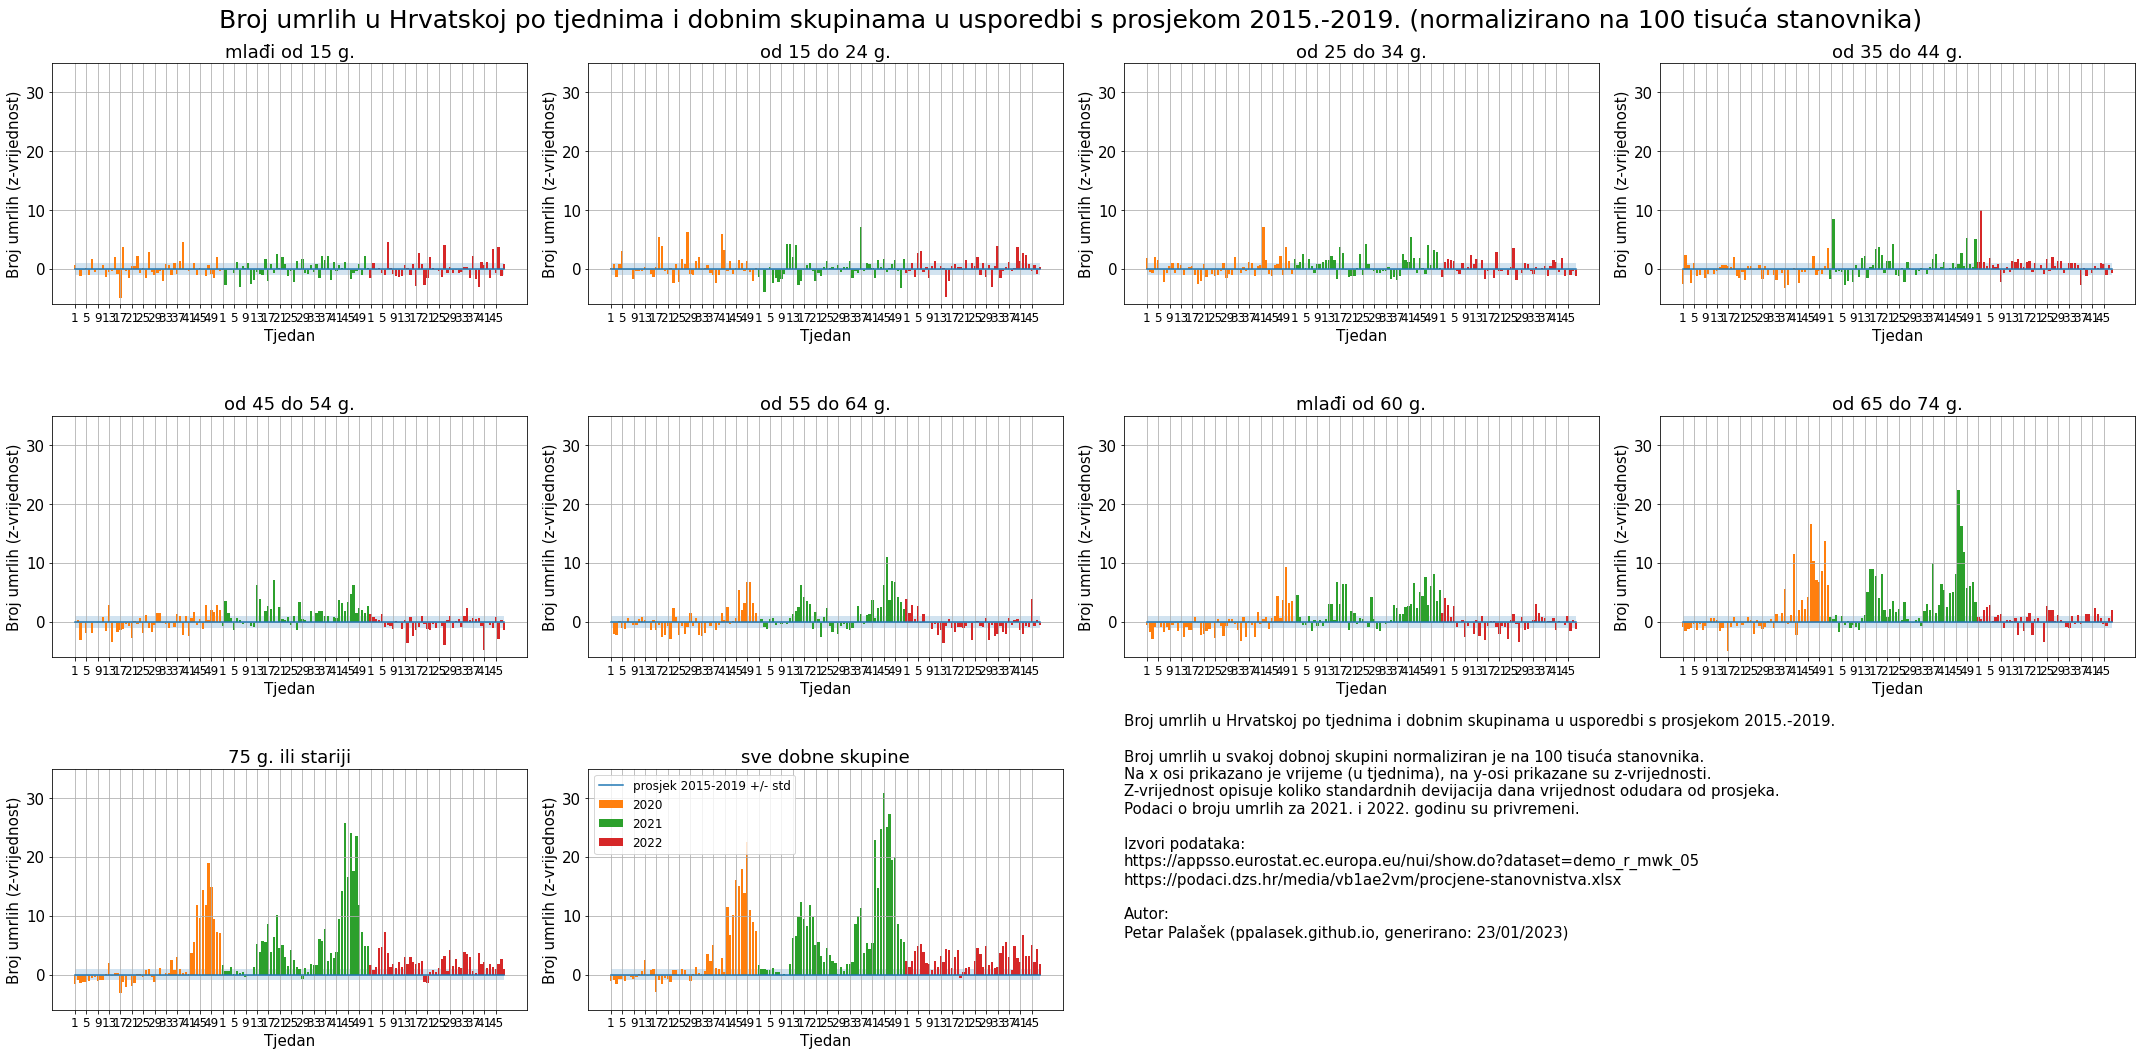

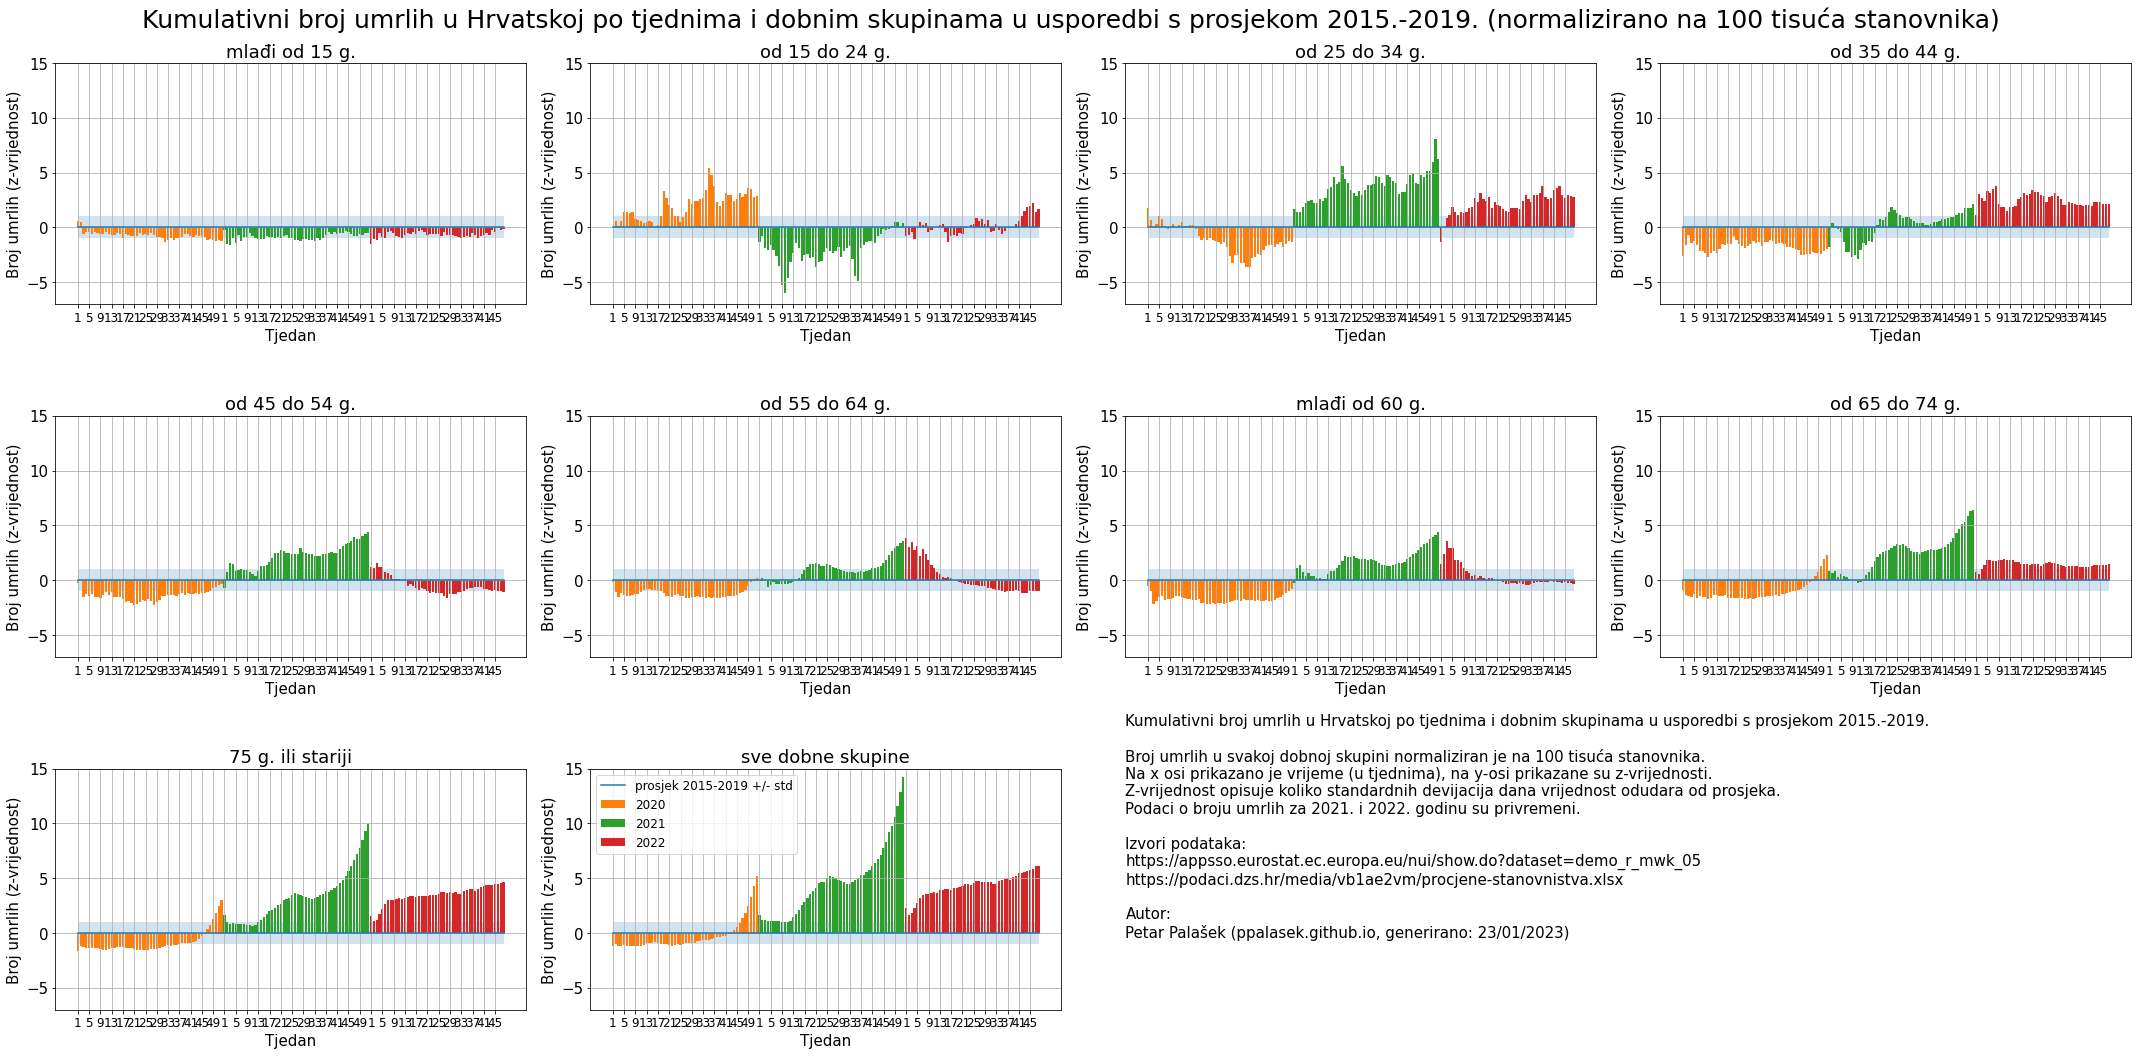

In [14]:
from datetime import date

group_maps = {}

same_y_axis = True

%matplotlib inline

import matplotlib.pyplot as plt

plt.rc('font', size=15) 
plt.rc('legend',fontsize=12)

fig, axs = plt.subplots(3, 4, figsize=(30, 15))
gs = axs[2, 0].get_gridspec()

fig_cumul, axs_cumul = plt.subplots(3, 4, figsize=(30, 15))
gs_cumul = axs_cumul[2, 0].get_gridspec()

for i, age_group in enumerate(sorted_age_groups):
    r = i // 4
    c = i % 4
    
    print(age_group)
    
    age_group_hr = age_group.replace('From', 'od').replace('to', 'do').replace('years', 'g.').replace('or over', 'ili stariji').replace('Less than', 'mlađi od').replace('Total', 'sve dobne skupine')
    
    if age_group == 'Less than 15 years':
        data_current_age = data[((data.AGE == 'Less than 5 years')|
                                 (data.AGE == 'From 5 to 9 years')|
                                 (data.AGE == 'From 10 to 14 years')) & (data.SEX == 'Total') & (data.Value.notnull())].copy()
    
    elif age_group == 'From 15 to 24 years':
        data_current_age = data[((data.AGE == 'From 15 to 19 years')|
                                 (data.AGE == 'From 20 to 24 years')) & (data.SEX == 'Total') & (data.Value.notnull())].copy()
    elif age_group == 'From 25 to 34 years':
        data_current_age = data[((data.AGE == 'From 25 to 29 years')|
                                 (data.AGE == 'From 30 to 34 years')) & (data.SEX == 'Total') & (data.Value.notnull())].copy()
    elif age_group == 'From 35 to 44 years':
        data_current_age = data[((data.AGE == 'From 35 to 39 years')|
                                 (data.AGE == 'From 40 to 44 years')) & (data.SEX == 'Total') & (data.Value.notnull())].copy()
    elif age_group == 'From 45 to 54 years':
        data_current_age = data[((data.AGE == 'From 45 to 49 years')|
                                 (data.AGE == 'From 50 to 54 years')) & (data.SEX == 'Total') & (data.Value.notnull())].copy()
    elif age_group == 'From 55 to 64 years':
        data_current_age = data[((data.AGE == 'From 55 to 59 years')|
                                 (data.AGE == 'From 60 to 64 years')) & (data.SEX == 'Total') & (data.Value.notnull())].copy()
    elif age_group == 'From 65 to 74 years':
        data_current_age = data[((data.AGE == 'From 65 to 69 years')|
                                 (data.AGE == 'From 70 to 74 years')) & (data.SEX == 'Total') & (data.Value.notnull())].copy()
    elif age_group == '75 years or over':
        data_current_age = data[((data.AGE == 'From 75 to 79 years')|
                                 (data.AGE == 'From 80 to 84 years')|
                                 (data.AGE == 'From 85 to 89 years')|
                                 (data.AGE == '90 years or over')) & (data.SEX == 'Total') & (data.Value.notnull())].copy()
    elif age_group == 'Less than 60 years':
        data_current_age = data[((data.AGE == 'Less than 5 years')|
                                 (data.AGE == 'From 5 to 9 years') |
                                 (data.AGE == 'From 10 to 14 years') |
                                 (data.AGE == 'From 15 to 19 years')|
                                 (data.AGE == 'From 20 to 24 years')|
                                 (data.AGE == 'From 25 to 29 years')|
                                 (data.AGE == 'From 30 to 34 years')|
                                 (data.AGE == 'From 35 to 39 years')|
                                 (data.AGE == 'From 40 to 44 years')|
                                 (data.AGE == 'From 45 to 49 years')|
                                 (data.AGE == 'From 50 to 54 years')|
                                 (data.AGE == 'From 55 to 59 years')) & (data.SEX == 'Total') & (data.Value.notnull())].copy()

    
    else:
        data_current_age = data[(data.AGE == age_group) & (data.SEX == 'Total') & (data.Value.notnull())].copy()
    
    data_current_age = data_current_age.groupby(['TIME']).Value.sum().to_frame().reset_index()

    data_current_age_2015_2019 = data_current_age[(data_current_age.TIME >= '2015W01') & (data_current_age.TIME < '2020W01')]
    data_current_age_2015_2019 = data_current_age_2015_2019.groupby(['TIME']).Value.sum().to_frame().reset_index()
        
    data_current_age_2020 = data_current_age[(data_current_age.TIME >= '2020W01') & (data_current_age.TIME < '2021W01')]
    data_current_age_2021 = data_current_age[(data_current_age.TIME >= '2021W01') & (data_current_age.TIME < '2022W01')]
    data_current_age_2022 = data_current_age[(data_current_age.TIME >= '2022W01') & (data_current_age.TIME < '2023W01')]
        
    week_avgs = []
    week_stds = []
    
    totals = []

    cumulative = []
    
    for week in range(1, 53):
        current_week = data_current_age_2015_2019[data_current_age_2015_2019.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_vals = [int(x) for x in current_week.Value.to_list()]

        current_vals_norm = []
        
        for y, year in enumerate(range(2015, 2020)):
            if age_group == 'Less than 15 years':
                pop = population[population.Group == 'Less than 5 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 5 to 9 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 10 to 14 years'][str(year)].iat[0]
            
            elif age_group == 'From 15 to 24 years':
                pop = population[population.Group == 'From 15 to 19 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 20 to 24 years'][str(year)].iat[0]
            elif age_group == 'From 25 to 34 years':
                pop = population[population.Group == 'From 25 to 29 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 30 to 34 years'][str(year)].iat[0]
            elif age_group == 'From 35 to 44 years':
                pop = population[population.Group == 'From 35 to 39 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 40 to 44 years'][str(year)].iat[0]
            elif age_group == 'From 45 to 54 years':
                pop = population[population.Group == 'From 45 to 49 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 50 to 54 years'][str(year)].iat[0]
            elif age_group == 'From 55 to 64 years':
                pop = population[population.Group == 'From 55 to 59 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 60 to 64 years'][str(year)].iat[0]
            elif age_group == 'From 65 to 74 years':
                pop = population[population.Group == 'From 65 to 69 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 70 to 74 years'][str(year)].iat[0]
            
            
            elif age_group == 'Less than 60 years':
                pop = population[population.Group == 'Less than 5 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 5 to 9 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 10 to 14 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 15 to 19 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 20 to 24 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 25 to 29 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 30 to 34 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 35 to 39 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 40 to 44 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 45 to 49 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 50 to 54 years'][str(year)].iat[0]
                pop += population[population.Group == 'From 55 to 59 years'][str(year)].iat[0]
            else:
                pop = population[population.Group == age_group][str(year)].iat[0]
        
            current_vals_norm.append(current_vals[y] / (pop / 100))
        
        current_vals_norm = np.asarray(current_vals_norm)
                
        week_avgs.append(current_vals_norm.mean())
        week_stds.append(current_vals_norm.std())
        
        if week == 1:
            totals = current_vals_norm
            cumulative.append(current_vals_norm.copy())
        else:
            totals += current_vals_norm
            
            cumulative.append(cumulative[-1] + current_vals_norm.copy())

    week_avgs = np.asarray(week_avgs)
    week_stds = np.asarray(week_stds)
    
    year_avg = totals.mean()
    year_std = totals.std()
    
    cumulative = np.asarray(cumulative)
    cumulative_avgs = cumulative.mean(axis=1)
    cumulative_stds = cumulative.std(axis=1)
    
    per_week_2020 = []
    per_week_2021 = []
    per_week_2022 = []
    
    cumulative_per_week_2020 = []
    cumulative_per_week_2021 = []
    cumulative_per_week_2022 = []

    for week in range(1, 53):
        current_week_2020 = data_current_age_2020[data_current_age_2020.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2021 = data_current_age_2021[data_current_age_2021.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2022 = data_current_age_2022[data_current_age_2022.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        pop = {}
        
        
        for year in range(2020, 2023):
            if age_group == 'Less than 15 years':
                pop[year] = population[population.Group == 'Less than 5 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 5 to 9 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 10 to 14 years'][str(year)].iat[0]
            elif age_group == 'From 15 to 24 years':
                pop[year] = population[population.Group == 'From 15 to 19 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 20 to 24 years'][str(year)].iat[0]
            elif age_group == 'From 25 to 34 years':
                pop[year] = population[population.Group == 'From 25 to 29 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 30 to 34 years'][str(year)].iat[0]
            elif age_group == 'From 35 to 44 years':
                pop[year] = population[population.Group == 'From 35 to 39 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 40 to 44 years'][str(year)].iat[0]
            elif age_group == 'From 45 to 54 years':
                pop[year] = population[population.Group == 'From 45 to 49 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 50 to 54 years'][str(year)].iat[0]
            elif age_group == 'From 55 to 64 years':
                pop[year] = population[population.Group == 'From 55 to 59 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 60 to 64 years'][str(year)].iat[0]
            elif age_group == 'From 65 to 74 years':
                pop[year] = population[population.Group == 'From 65 to 69 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 70 to 74 years'][str(year)].iat[0]   
            elif age_group == 'Less than 60 years':
                pop[year] = population[population.Group == 'Less than 5 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 5 to 9 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 10 to 14 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 15 to 19 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 20 to 24 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 25 to 29 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 30 to 34 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 35 to 39 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 40 to 44 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 45 to 49 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 50 to 54 years'][str(year)].iat[0]
                pop[year] += population[population.Group == 'From 55 to 59 years'][str(year)].iat[0]
            else:
                pop[year] = population[population.Group == age_group][str(year)].iat[0]
            
        norm_2020 = int(current_week_2020.Value.iat[0]) / (pop[2020] / 100)
        norm_2021 = int(current_week_2021.Value.iat[0]) / (pop[2021] / 100)
        
        per_week_2020.append(norm_2020)
        
        if week == 1:
            cumulative_per_week_2020.append(norm_2020)
        else:
            cumulative_per_week_2020.append(cumulative_per_week_2020[-1] + norm_2020)
        
        per_week_2021.append(norm_2021)

        if week == 1:
            cumulative_per_week_2021.append(norm_2021)
        else:
            cumulative_per_week_2021.append(cumulative_per_week_2021[-1] + norm_2021)
        
        
        try:
            norm_2022 = int(current_week_2022.Value.iat[0]) / (pop[2022] / 100)
            per_week_2022.append(norm_2022)
            
            if week == 1:
                cumulative_per_week_2022.append(norm_2022)
            else:
                cumulative_per_week_2022.append(cumulative_per_week_2022[-1] + norm_2022)
        except:
            pass
        

    # per week
    stds = (week_stds / week_stds).tolist()
    stds_rep = np.asarray(stds + stds + stds[:len(per_week_2022)])
    
    axs[r, c].plot([0] * len(stds_rep), label='prosjek 2015-2019 +/- std')

    
    axs[r, c].fill_between(range(len(stds_rep)), -stds_rep, stds_rep, alpha=0.2)

    axs[r, c].bar(range(len(per_week_2020)), (per_week_2020 - week_avgs) / week_stds, label='2020')
    axs[r, c].bar(range(len(per_week_2020), len(per_week_2021) + len(per_week_2021)), (per_week_2021 - week_avgs) / week_stds, label='2021')
    axs[r, c].bar(range(len(per_week_2020) + len(per_week_2021), len(per_week_2020) + len(per_week_2021) + len(per_week_2022)), (per_week_2022 - week_avgs[:len(per_week_2022)]) / week_stds[:len(per_week_2022)], label='2022')

    
    
    axs[r, c].grid('on')

    axs[r, c].set_ylabel('Broj umrlih (z-vrijednost)')
    axs[r, c].set_xlabel('Tjedan')


    axs[r, c].set_xticks(range(0, len(stds_rep), 4))
    axs[r, c].set_xticklabels(map(str, [x % 52 + 1 for x in range(0, len(stds_rep), 4)]), fontsize=12)
    
    
    axs[r, c].set_title(age_group_hr)
    
    if same_y_axis:
        axs[r, c].set_ylim(-6, 35)
    
    
    total_2020 = sum(per_week_2020)
    print(total_2020)

    print('2020 z', (total_2020 - year_avg) / year_std)

    total_2021 = sum(per_week_2021)
    print(total_2021)

    print('2021 z', (total_2021 - year_avg) / year_std)
    print()
    
    
    ## cumulative
    # per week
    stds = (cumulative_stds / cumulative_stds).tolist()
    stds_rep = np.asarray(stds + stds + stds[:len(cumulative_per_week_2022)])
    
    axs_cumul[r, c].plot([0] * len(stds_rep), label='prosjek 2015-2019 +/- std')

    
    axs_cumul[r, c].fill_between(range(len(stds_rep)), -stds_rep, stds_rep, alpha=0.2)

    axs_cumul[r, c].bar(range(len(cumulative_per_week_2020)), (cumulative_per_week_2020 - cumulative_avgs) / cumulative_stds, label='2020')
    axs_cumul[r, c].bar(range(len(cumulative_per_week_2020), len(cumulative_per_week_2021) + len(cumulative_per_week_2021)), (cumulative_per_week_2021 - cumulative_avgs) / cumulative_stds, label='2021')
    axs_cumul[r, c].bar(range(len(cumulative_per_week_2020) + len(cumulative_per_week_2021), len(cumulative_per_week_2020) + len(cumulative_per_week_2021) + len(cumulative_per_week_2022)), (cumulative_per_week_2022 - cumulative_avgs[:len(cumulative_per_week_2022)]) / cumulative_stds[:len(cumulative_per_week_2022)], label='2022')

    
    
    axs_cumul[r, c].grid('on')

    axs_cumul[r, c].set_ylabel('Broj umrlih (z-vrijednost)')
    axs_cumul[r, c].set_xlabel('Tjedan')


    axs_cumul[r, c].set_xticks(range(0, len(stds_rep), 4))
    axs_cumul[r, c].set_xticklabels(map(str, [x % 52 + 1 for x in range(0, len(stds_rep), 4)]), fontsize=12)
    
    
    axs_cumul[r, c].set_title(age_group_hr)
    
    if same_y_axis:
        axs_cumul[r, c].set_ylim(-7, 15)
    
    
axs[r, c].legend()

for ax in axs[-1, -2:]:
    ax.remove()
    

ax_text = fig.add_subplot(gs[2, 2:])

ax_text.text(0, 0.3, 'Broj umrlih u Hrvatskoj po tjednima i dobnim skupinama u usporedbi s prosjekom 2015.-2019.\n\nBroj umrlih u svakoj dobnoj skupini normaliziran je na 100 tisuća stanovnika.\nNa x osi prikazano je vrijeme (u tjednima), na y-osi prikazane su z-vrijednosti.\nZ-vrijednost opisuje koliko standardnih devijacija dana vrijednost odudara od prosjeka.\nPodaci o broju umrlih za 2021. i 2022. godinu su privremeni.\n\nIzvori podataka:\nhttps://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=demo_r_mwk_05\nhttps://podaci.dzs.hr/media/vb1ae2vm/procjene-stanovnistva.xlsx\n\nAutor:\nPetar Palašek (ppalasek.github.io, generirano: {})'.format(date.today().strftime("%d/%m/%Y")))
ax_text.axis('off')


plt.figure(fig.number)

plt.suptitle('Broj umrlih u Hrvatskoj po tjednima i dobnim skupinama u usporedbi s prosjekom 2015.-2019. (normalizirano na 100 tisuća stanovnika)', fontsize=25)


note = ''
if same_y_axis:
    note = '_same_y'

plt.tight_layout()
plt.savefig('img/cro_excess_all_z_score{}.png'.format(note), dpi=100, transparent=False, bbox_inches='tight', facecolor='white')



plt.figure(fig_cumul.number)


axs_cumul[r, c].legend()

for ax in axs_cumul[-1, -2:]:
    ax.remove()
    

ax_text = fig_cumul.add_subplot(gs_cumul[2, 2:])

ax_text.text(0, 0.3, 'Kumulativni broj umrlih u Hrvatskoj po tjednima i dobnim skupinama u usporedbi s prosjekom 2015.-2019.\n\nBroj umrlih u svakoj dobnoj skupini normaliziran je na 100 tisuća stanovnika.\nNa x osi prikazano je vrijeme (u tjednima), na y-osi prikazane su z-vrijednosti.\nZ-vrijednost opisuje koliko standardnih devijacija dana vrijednost odudara od prosjeka.\nPodaci o broju umrlih za 2021. i 2022. godinu su privremeni.\n\nIzvori podataka:\nhttps://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=demo_r_mwk_05\nhttps://podaci.dzs.hr/media/vb1ae2vm/procjene-stanovnistva.xlsx\n\nAutor:\nPetar Palašek (ppalasek.github.io, generirano: {})'.format(date.today().strftime("%d/%m/%Y")))
ax_text.axis('off')


plt.suptitle('Kumulativni broj umrlih u Hrvatskoj po tjednima i dobnim skupinama u usporedbi s prosjekom 2015.-2019. (normalizirano na 100 tisuća stanovnika)', fontsize=25)



plt.tight_layout()
plt.savefig('img/cro_excess_all_z_score_cumul{}.png'.format(note), dpi=100, transparent=False, bbox_inches='tight', facecolor='white')

plt.show()

In [15]:
(cumulative_per_week_2022 - cumulative_avgs[:len(cumulative_per_week_2022)]) / cumulative_stds[:len(cumulative_per_week_2022)]

array([2.25083787, 1.63278109, 1.81692009, 2.2970476 , 2.77883474,
       3.17589965, 3.50876324, 3.57439259, 3.59388069, 3.67688513,
       3.75802234, 3.68772334, 3.92537076, 3.9281372 , 4.00031544,
       4.02864887, 3.93451676, 4.07479263, 4.12034288, 4.19625402,
       4.33784469, 4.4816883 , 4.4571459 , 4.37360757, 4.60384388,
       4.77014909, 4.7381174 , 4.64717004, 4.6864753 , 4.66247861,
       4.67531933, 4.43743678, 4.44630894, 4.73388848, 4.80511393,
       4.92178798, 4.9876371 , 4.8491258 , 5.13953251, 5.24671522,
       5.44709822, 5.52204929, 5.61363699, 5.66496285, 5.79240148,
       5.85816773, 6.0781163 , 6.09883443])

In [16]:
(cumulative_per_week_2021 - cumulative_avgs[:len(cumulative_per_week_2021)]) / cumulative_stds[:len(cumulative_per_week_2021)]

array([ 1.62408999,  1.20073297,  1.14771056,  1.11124523,  1.07484815,
        1.13290596,  1.13322356,  1.12918752,  1.0369003 ,  1.05015129,
        1.0046961 ,  1.12323533,  1.46041703,  1.77258151,  2.13275083,
        2.52805457,  2.85569738,  3.2287941 ,  3.54092207,  3.85610757,
        4.14456265,  4.52458343,  4.61375445,  4.69503494,  5.06177069,
        5.18058957,  5.07523996,  5.00896628,  4.82811919,  4.74843507,
        4.62128622,  4.44373993,  4.47556953,  4.69766829,  4.83598902,
        5.05236095,  5.28713773,  5.26803804,  5.58859929,  5.75406311,
        6.07833091,  6.35421861,  6.73767483,  7.1679467 ,  7.75899154,
        8.34832389,  9.23209002,  9.81199821, 10.55685195, 11.59886693,
       12.91493268, 14.25979025])

In [17]:
(cumulative_per_week_2020 - cumulative_avgs[:len(cumulative_per_week_2020)]) / cumulative_stds[:len(cumulative_per_week_2020)]

array([-1.167543  , -1.02095048, -1.20564875, -1.14816147, -1.10513087,
       -1.17555466, -1.14101491, -1.14151759, -1.16923277, -1.22500957,
       -1.1709891 , -1.05333283, -0.95130142, -0.93869907, -0.88456016,
       -0.81841371, -0.920399  , -0.96473545, -0.9935734 , -1.03036142,
       -1.08486145, -1.17358848, -1.104308  , -1.02587603, -1.0607577 ,
       -1.02241549, -0.9409661 , -0.92138246, -0.93259467, -0.88484155,
       -0.749302  , -0.68385378, -0.66754817, -0.65751458, -0.59220944,
       -0.53943471, -0.44099006, -0.37394898, -0.3531469 , -0.25162719,
       -0.24446612, -0.10113445,  0.06651764,  0.24636193,  0.53019694,
        0.8732706 ,  1.36911621,  1.81675819,  2.48629309,  3.28746105,
        4.26378286,  5.1809793 ])